In [97]:
import numpy as np
import matplotlib.pyplot as plt
rnjesus = np.random.default_rng(42)

p = np.genfromtxt("./probability_matrix.csv", delimiter=",")
n = p.shape[0]
EPSILON = 1e-9
K=100
s0 = np.full(n, 1 / n)
s1 = rnjesus.dirichlet(np.ones(n))

print(p)
print(f"{s0}: {s0.sum()}")
print(f"{s1}: {s1.sum()}")

[[0.1  0.5  0.   0.   0.2  0.   0.   0.2 ]
 [0.3  0.2  0.   0.5  0.   0.   0.   0.  ]
 [0.   0.   0.3  0.   0.   0.   0.7  0.  ]
 [0.25 0.2  0.   0.4  0.   0.   0.   0.15]
 [0.1  0.   0.   0.2  0.5  0.   0.   0.2 ]
 [0.   0.   0.4  0.   0.   0.6  0.   0.  ]
 [0.1  0.   0.   0.15 0.   0.05 0.7  0.  ]
 [0.   0.1  0.   0.1  0.   0.   0.   0.8 ]]
[0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]: 1.0
[0.17837614 0.17332959 0.17693326 0.02075886 0.00641307 0.10777766
 0.10460962 0.23180179]: 1.0000000000000002


[1.37436147e-01 1.92897077e-01 2.25147113e-08 2.41303800e-01
 5.49744587e-02 2.93440464e-08 1.29894985e-07 3.73388335e-01]


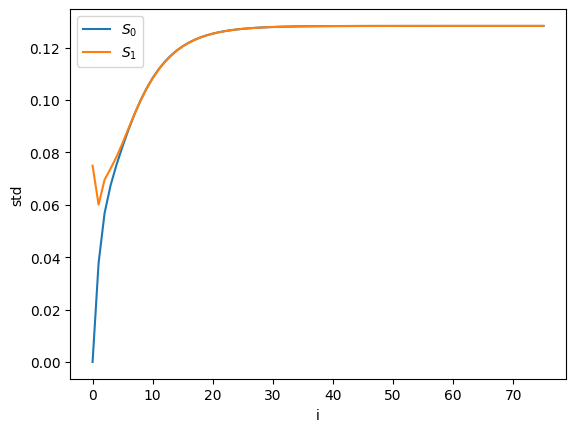

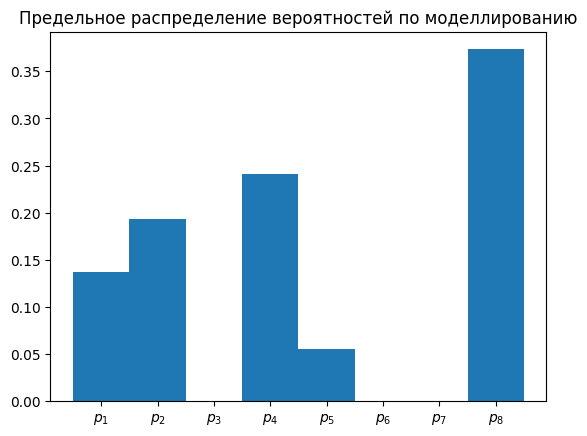

In [98]:
s0_step = s0.copy()
s1_step = s1.copy()
s0_std = [s0.std()]
s1_std = [s1.std()]

for _ in range(100):
    s0_step @= p
    s1_step @= p
    s0_std.append(s0_step.std())
    s1_std.append(s1_step.std())
    if (s0_step - s1_step).std() < EPSILON:
        break

print(s0_step)

plt.plot(s0_std, label="$S_0$")
plt.plot(s1_std, label="$S_1$")
plt.xlabel("i")
plt.ylabel("std")
plt.legend()
plt.show()

plt.title("Предельное распределение вероятностей по моделлированию")
plt.stairs(s0_step, fill=True)
plt.xticks(np.fromiter((i + 0.5 for i in range(n)), float), (f"$p_{i}$" for i in range(1, n + 1)))
plt.show()

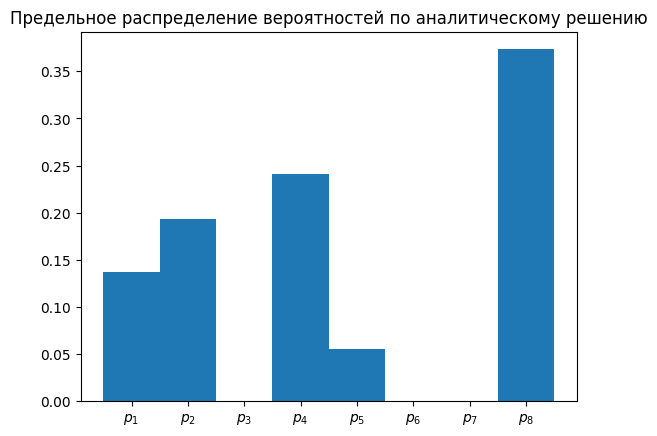

Среднеквадратическое отклонение векторов полученных двумя способами: 6.850232801370258e-08


In [99]:
a = p.T - np.eye(n)
a[0] = 1
b = np.hstack((np.ones(1), np.zeros(n - 1)))
x = np.linalg.solve(a, b)

plt.title("Предельное распределение вероятностей по аналитическому решению")
plt.stairs(x, fill=True)
plt.xticks(np.fromiter((i + 0.5 for i in range(n)), float), (f"$p_{i}$" for i in range(1, n + 1)))
plt.show()

print(f"Среднеквадратическое отклонение векторов полученных двумя способами: {(s0_step - x).std()}")